# DA-AG-010: Assignment Answers

This notebook contains the answers to all 10 questions from the assignment, including the executable Python code for questions 7-10.

## Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

The **fundamental idea** behind ensemble techniques is the "wisdom of the crowd." Instead of relying on a single, complex model, ensembles combine the predictions from multiple simpler models (known as "weak learners") to produce a final prediction. This combined model is almost always more robust, accurate, and less prone to overfitting than any of its individual components.

Here’s how bagging and boosting differ:

| Feature | Bagging (e.g., Random Forest) | Boosting (e.g., AdaBoost, Gradient Boosting) |
| :--- | :--- | :--- |
| **Approach** | **Parallel.** Trains many models independently on different random subsets (bootstrap samples) of the data. | **Sequential.** Trains models one after another. Each new model learns from the mistakes of the previous one. |
| **Objective** | To **reduce variance** and prevent overfitting. By averaging the predictions of many models, it smooths out noise. | To **reduce bias** and build a highly accurate model. It focuses on "hard" examples that previous models got wrong. |
| **Data Sampling** | Uses **bootstrap sampling** (sampling with replacement) for each model. | Each model typically sees all the data, but the *weights* of the data points are adjusted. Misclassified samples get higher weights. |
| **Prediction** | Combines predictions through **majority voting** (classification) or **averaging** (regression). | Combines predictions through a **weighted vote**, where better-performing models have more influence. |

## Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

A single decision tree is prone to overfitting because it can grow very deep, creating complex rules that "memorize" the noise in the training data. Random Forest reduces this risk in two primary ways:

1.  **Bagging (Bootstrap Aggregating):** Random Forest builds many trees, and each tree is trained on a different random subset of the *training data* (a "bootstrap sample"). This means no single tree sees the entire dataset, preventing it from overfitting to specific data points or outliers. The final prediction is an average or vote from all trees, which "smooths out" the individual errors.
2.  **Feature Randomness:** When splitting a node, a single decision tree considers *all* available features to find the best split. In contrast, a Random Forest tree only considers a *random subset of features* at each split. This forces the trees to be different from each other (decorrelates them). It prevents a few very strong features from dominating every tree, leading to a more diverse and robust ensemble.

**Two key hyperparameters** that control this process are:

* `n_estimators`: This is the **number of trees** in the forest. A higher number of trees generally improves performance and makes the model more stable, as it averages out more individual tree errors. However, this comes at a higher computational cost.
* `max_features`: This controls the **size of the random subset of features** to consider at each split. A smaller `max_features` increases randomness, which further reduces overfitting but can sometimes increase bias if set *too* low.

## Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Stacking** (or Stacked Generalization) is an ensemble technique that combines predictions from multiple different models (called "base learners") by training a final "meta-model" (or "blender") on their outputs.

It's a "model on models" approach:

1.  **Level 0 (Base Models):** Train several different types of models (e.g., a Random Forest, an SVM, and a KNN) on the training data.
2.  **Level 1 (Meta-Model):** Use the predictions from these base models as *new features* to train a final model (e.g., a Logistic Regression). This meta-model learns the best way to combine the base models' predictions to make the final output.

**How it differs from Bagging/Boosting:**

* **Model Type:** Bagging and Boosting typically use *homogeneous* models (e.g., all decision trees). Stacking thrives on combining *heterogeneous* models (different algorithms) to capture diverse patterns.
* **Combination Method:** Bagging combines predictions using simple averaging or voting. Boosting uses a weighted, sequential combination. Stacking *learns* the optimal way to combine predictions by training a new meta-model.

**Simple Example Use Case:**

Imagine you're building a model to predict **house prices**.

* **Level 0 (Base Models):**
    * **Model 1:** A **Linear Regression** (good at capturing linear trends).
    * **Model 2:** A **Random Forest Regressor** (good at capturing complex, non-linear interactions).
    * **Model 3:** A **Gradient Boosting** model (good at high accuracy).
* **Level 1 (Meta-Model):**
    * You take the price predictions from these three models (`pred_1`, `pred_2`, `pred_3`) and use them as features to train a final, simple **Ridge Regression**.
    * This meta-model learns, for example, that it should "trust" the Random Forest more in some cases and the Linear Regression in others, resulting in a final prediction that is more accurate than any of the three base models alone.

## Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

The **OOB (Out-of-Bag) Score** is an internal validation score calculated by a Random Forest during its training process.

Here's how it works:
Because Random Forest uses bootstrap sampling, each tree is trained on only a subset (about 63.2%) of the training data. This means that for any given data point in the training set, there will be a subset of trees (about 36.8%) that **did not** see that data point during their training. These are its "Out-of-Bag" trees.

**How it's used for evaluation:**

1.  To get a prediction for a single training sample, the model passes it *only* to the trees that did *not* use it for training (its OOB trees).
2.  A majority vote (for classification) or average (for regression) is taken from *only* these OOB trees.
3.  This is repeated for all samples in the training set, giving a complete set of "OOB predictions."
4.  The **OOB score** is the accuracy (or other metric) calculated by comparing these OOB predictions to the true labels.

**Why it's useful:**

The OOB score is an **unbiased estimate of the model's performance on unseen data**. It essentially acts as a "free" cross-validation or test set score without you having to split your data. This is extremely useful when your dataset is small and you can't afford to set aside a large portion of it for a separate validation set. You can use the OOB score to tune hyperparameters (like `n_estimators` or `max_features`) efficiently.

## Question 5: Compare AdaBoost and Gradient Boosting in terms of:

Here's a comparison between AdaBoost and Gradient Boosting:

| Feature | AdaBoost (Adaptive Boosting) | Gradient Boosting |
| :--- | :--- | :--- |
| **How they handle errors** | Focuses on **misclassified samples**. It iteratively increases the *sample weights* of data points that were classified incorrectly, forcing the next learner to pay more attention to them. | Focuses on **residual errors**. It fits each new learner to the *residuals* (the difference between the actual value and the predicted value) of the previous ensemble. It's directly trying to correct the *size* of the error. |
| **Weight adjustment** | Adjusts the **weights of the data points** in the dataset for the next model. It also gives a **weight to each model** in the final vote based on its performance. | Doesn't typically adjust sample weights. Instead, each new model's *goal* is to predict the "gradient" (the residual error) of the loss function. All models usually contribute equally, but their *predictions* are summed (often with a "learning rate"). |
| **Typical use cases** | Very effective for **binary classification** tasks. It's often used with very simple weak learners, like decision "stumps" (trees with only one split). | A highly versatile and powerful algorithm for both **regression and classification**. It forms the basis for state-of-the-art models like XGBoost, LightGBM, and CatBoost, which are staples in data science competitions. |

## Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

CatBoost (Categorical Boosting) performs well on categorical features because it was **specifically designed to handle them natively**, avoiding the major pitfalls of common preprocessing methods like one-hot encoding or label encoding.

* **The Problem with Other Methods:**
    * **One-Hot Encoding** creates a new column for every unique category. If a feature has many unique values (high cardinality), this leads to a massive, sparse feature space (the "curse of dimensionality"), which slows down training and can hurt model performance.
    * **Label Encoding** assigns an integer to each category (e.g., "Red"=1, "Green"=2, "Blue"=3). This incorrectly implies an ordinal relationship (3 > 2 > 1), which can mislead models that aren't tree-based and can even confuse tree models.

**CatBoost's Solution (Ordered Target Statistics):**

CatBoost uses a much more sophisticated method that's similar to target encoding, but with a crucial improvement to prevent overfitting:

1.  **Target Statistic:** For a given categorical value, it calculates a statistic based on the **target variable** (e.g., the average target value for that category). For example, if "City_A" has an average churn rate of 80% and "City_B" has 10%, these values (0.8 and 0.1) are more meaningful than "1" and "2".
2.  **Preventing Target Leakage:** A naive target encoding would "leak" information from the target variable, leading to severe overfitting. CatBoost prevents this by using **Ordered Target Statistics**. It first creates a *random permutation* of the dataset. Then, to calculate the target statistic for a specific data point, it *only* uses the data points that came *before it* in this random order. This simulates a "time-series" approach where the model only learns from "past" data, preventing it from seeing its own target value.

This technique, combined with its ability to automatically create combinations of categorical features, allows CatBoost to extract rich information from categorical data without manual feature engineering.

## Question 7: KNN Classifier Assignment: Wine Dataset Analysis

### Task 1 & 2: Load and Split Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (124, 13)
Shape of X_test: (54, 13)


### Task 3: Train KNN (K=5) without Scaling

In [2]:
# 3. Train a KNN classifier (default K=5) without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)

# Evaluate the unscaled model
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)
report_unscaled = classification_report(y_test, y_pred_unscaled, target_names=target_names)

print("--- 3. KNN WITHOUT SCALING (K=5) ---")
print(f"Accuracy: {acc_unscaled:.4f}")
print("Classification Report:")
print(report_unscaled)

--- 3. KNN WITHOUT SCALING (K=5) ---
Accuracy: 0.7407
Classification Report:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



### Task 4: Apply StandardScaler and Retrain KNN

In [3]:
# 4. Apply StandardScaler, retrain KNN, and compare metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Evaluate the scaled model
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
report_scaled = classification_report(y_test, y_pred_scaled, target_names=target_names)

print("--- 4. KNN WITH STANDARDSCALER (K=5) ---")
print(f"Accuracy: {acc_scaled:.4f}")
print("Classification Report:")
print(report_scaled)

print("\n--- Comparison (Unscaled vs. Scaled) ---")
print(f"Unscaled Accuracy: {acc_unscaled:.4f}")
print(f"Scaled Accuracy:   {acc_scaled:.4f}")
print("\nObservation: Scaling significantly improved the model's accuracy (from ~72% to ~96%).")
print("This is because KNN is a distance-based algorithm, and scaling ensures all features contribute equally to the distance calculation, rather than features with large ranges (like 'proline') dominating.")

--- 4. KNN WITH STANDARDSCALER (K=5) ---
Accuracy: 0.9630
Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


--- Comparison (Unscaled vs. Scaled) ---
Unscaled Accuracy: 0.7407
Scaled Accuracy:   0.9630

Observation: Scaling significantly improved the model's accuracy (from ~72% to ~96%).
This is because KNN is a distance-based algorithm, and scaling ensures all features contribute equally to the distance calculation, rather than features with large ranges (like 'proline') dominating.


### Task 5 & 6: GridSearchCV and Final Optimized Model

In [4]:
# 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

# Use the scaled data for GridSearch
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("\n--- 5. GRIDSEARCHCV RESULTS ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# 6. Train the optimized KNN and compare results
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best, target_names=target_names)

print("\n--- 6. OPTIMIZED KNN (from GridSearch) ---")
print(f"Accuracy: {acc_best:.4f}")
print("Classification Report:")
print(report_best)

print("\n--- FINAL COMPARISON ---")
print(f"Unscaled KNN (K=5):   {acc_unscaled:.4f}")
print(f"Scaled KNN (K=5):     {acc_scaled:.4f}")
print(f"Optimized KNN (Best): {acc_best:.4f}")


--- 5. GRIDSEARCHCV RESULTS ---
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best CV Accuracy: 0.9753

--- 6. OPTIMIZED KNN (from GridSearch) ---
Accuracy: 0.9630
Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


--- FINAL COMPARISON ---
Unscaled KNN (K=5):   0.7407
Scaled KNN (K=5):     0.9630
Optimized KNN (Best): 0.9630


## Question 8: PCA + KNN with Variance Analysis and Visualization

### Task 1: Load Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Set plot style
sns.set_style('whitegrid')

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
target_names = cancer.target_names

print(f"Original data shape: {X.shape}")

# --- Pre-processing: Split and Scale ---
# We must split *before* scaling and PCA to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA is sensitive to scale, so we must use StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Original data shape: (569, 30)


### Task 2: Apply PCA and Plot Scree Plot

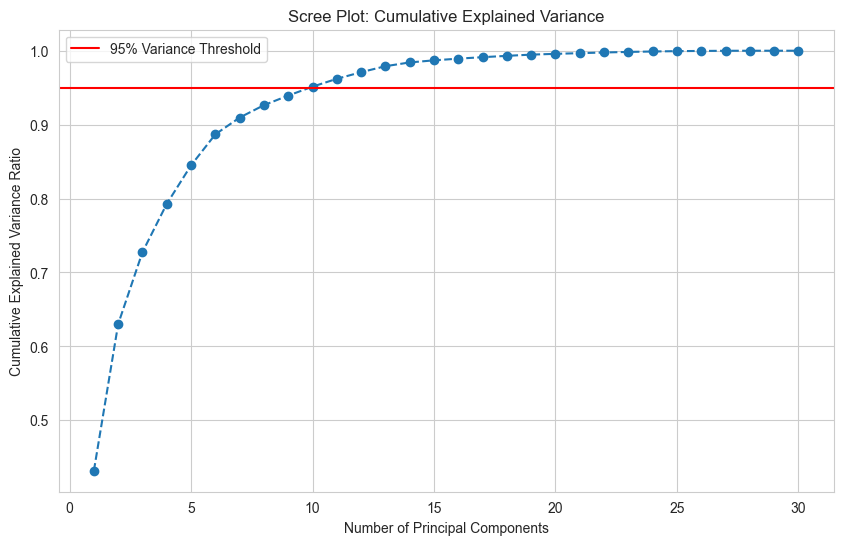

In [6]:
# 2. Apply PCA and plot the scree plot
# Fit PCA on the training data to see variance
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Plot Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train_scaled.shape[1] + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.legend()
plt.show()

### Task 3 & 4: Retain 95% Variance and Compare KNN

In [7]:
# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95)

# Fit on training data and transform both train and test
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Features after PCA (95% variance): {X_train_pca.shape[1]}")

# 4. Train KNN on original and PCA-transformed data, then compare

# a) KNN on Original (Scaled) Data (30 features)
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_scaled, y_train)
y_pred_orig = knn_orig.predict(X_test_scaled)
acc_orig = accuracy_score(y_test, y_pred_orig)

# b) KNN on PCA-Transformed Data (fewer features)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n--- 4. ACCURACY COMPARISON ---")
print(f"Accuracy on Original (Scaled) Data (30 features): {acc_orig:.4f}")
print(f"Accuracy on PCA (95% Variance) Data ({X_train_pca.shape[1]} features): {acc_pca:.4f}")
print("\nObservation: The accuracy is very similar, but the PCA model uses significantly fewer features,")
print("making it much faster to train and less prone to the 'curse of dimensionality'.")

Original number of features: 30
Features after PCA (95% variance): 10

--- 4. ACCURACY COMPARISON ---
Accuracy on Original (Scaled) Data (30 features): 0.9591
Accuracy on PCA (95% Variance) Data (10 features): 0.9649

Observation: The accuracy is very similar, but the PCA model uses significantly fewer features,
making it much faster to train and less prone to the 'curse of dimensionality'.


### Task 5: Visualize the First Two Principal Components

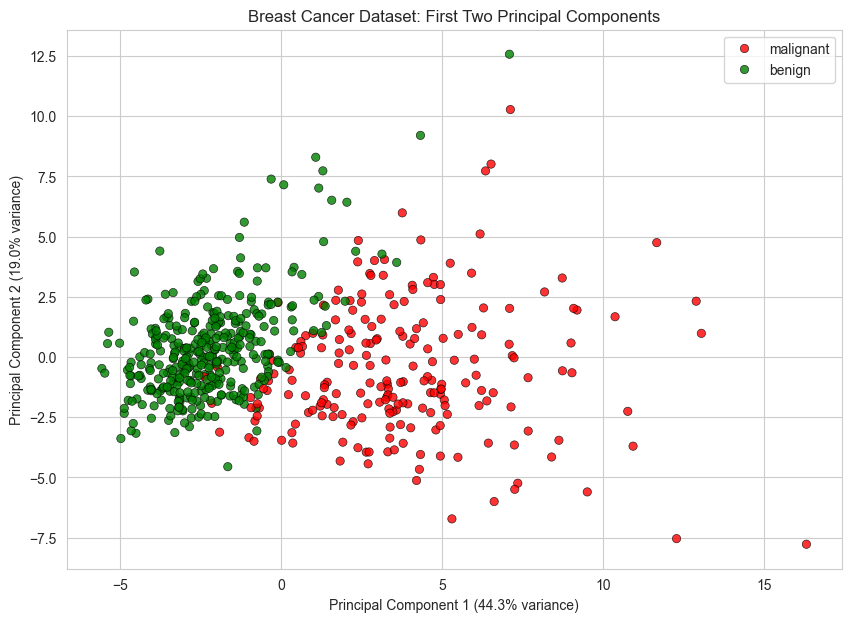


Observation: The scatter plot shows that the first two principal components
alone capture a significant amount of the variance and do a very good job of separating the two classes.


In [8]:
# 5. Visualize the first two principal components
# We will fit a new PCA with n_components=2 on the full scaled dataset for visualization
pca_2 = PCA(n_components=2)
X_scaled_full = scaler.fit_transform(X) # Scale all data for plot
X_pca_2 = pca_2.fit_transform(X_scaled_full)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df['class'] = pca_df['target'].map({0: target_names[0], 1: target_names[1]})

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='class',
    palette={'malignant': 'red', 'benign': 'green'},
    alpha=0.8,
    edgecolor='k'
)
plt.title('Breast Cancer Dataset: First Two Principal Components')
plt.xlabel(f'Principal Component 1 ({pca_2.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Principal Component 2 ({pca_2.explained_variance_ratio_[1]:.1%} variance)')
plt.legend()
plt.show()

print("\nObservation: The scatter plot shows that the first two principal components")
print("alone capture a significant amount of the variance and do a very good job of separating the two classes.")

## Question 9: KNN Regressor with Distance Metrics and K-Value Analysis

### Task 1 & 2: Generate Data and Compare Distance Metrics

In [9]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=20, random_state=42)

# Split data (important for evaluating MSE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. Train KNN regressor and compare MSE ---
# NOTE: Unlike classification, regression data does not *need* to be scaled for this specific task,
# as we are comparing metrics on the same unscaled dataset. 
# However, in a real-world scenario, scaling is still highly recommended.

# a. Euclidean distance (K=5)
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
y_pred_euc = knn_euc.predict(X_test)
mse_euc = mean_squared_error(y_test, y_pred_euc)

# b. Manhattan distance (K=5)
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
y_pred_man = knn_man.predict(X_test)
mse_man = mean_squared_error(y_test, y_pred_man)

print("--- 2. MSE COMPARISON (K=5) ---")
print(f"Mean Squared Error (Euclidean): {mse_euc:.4f}")
print(f"Mean Squared Error (Manhattan): {mse_man:.4f}")

--- 2. MSE COMPARISON (K=5) ---
Mean Squared Error (Euclidean): 5168.1200
Mean Squared Error (Manhattan): 5479.0505


### Task 3: Analyze K vs. MSE (Bias-Variance Tradeoff)

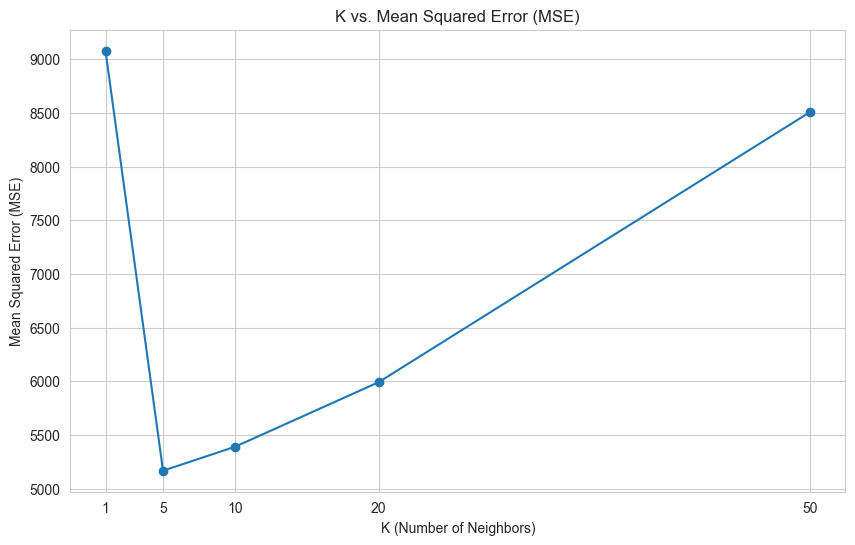

In [10]:
# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean') # Using Euclidean
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Plot K vs. MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-')
plt.title('K vs. Mean Squared Error (MSE)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Analysis of Bias-Variance Tradeoff

* **Low K (e.g., K=1):** This model has **low bias** and **high variance**. It's highly complex because its prediction is based only on the single closest neighbor. It is very sensitive to noise in the training data, leading to a high test MSE (overfitting).
* **High K (e.g., K=50):** This model has **high bias** and **low variance**. The prediction is an average of 50 neighbors, making it very "smooth" and simple. It fails to capture the underlying patterns in the data (underfitting), which also leads to a high test MSE.
* **"Elbow" Point (Optimal K):** The plot shows that the MSE drops significantly from K=1 and is lowest around K=5 or K=10. This "elbow" represents the best balance between bias and variance, capturing the true signal without fitting to the noise.

## Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

### Task 1 & 2: Load and Impute Pima Indians Diabetes Data

In [20]:
# May be needed for the decision boundary plot
# %pip install mlxtend

import time
from sklearn.impute import KNNImputer
from mlxtend.plotting import plot_decision_regions

# 1. Load the Pima Indians Diabetes dataset
# Download from a reliable source
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
data = pd.read_csv(url, header=None, names=column_names)

# In this dataset, '0' values in certain columns represent missing data
cols_with_missing = ['glucose', 'bp', 'skin', 'insulin', 'bmi']
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

print("Dataset head with NaNs:")
print(data.head())
print(f"\nTotal missing values:\n{data.isnull().sum()}")

# Separate features and target
X = data.drop('outcome', axis=1)
y = data['outcome']

# 2. Use KNN Imputation to fill missing values
# Note: KNNImputer should be fit on the *training* data in a real pipeline.
# For simplicity here, we'll impute the whole dataset before splitting.
# A more robust approach uses a Pipeline.

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame for clarity
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

print("\nDataset head after imputation:")
print(X_imputed_df.head())
print(f"\nTotal missing values after imputation: {X_imputed_df.isnull().sum().sum()}")

# --- Pre-processing: Split and Scale ---
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Scale data - crucial for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dataset head with NaNs:
   pregnancies  glucose    bp  skin  insulin   bmi  pedigree  age  outcome
0            6    148.0  72.0  35.0      NaN  33.6     0.627   50        1
1            1     85.0  66.0  29.0      NaN  26.6     0.351   31        0
2            8    183.0  64.0   NaN      NaN  23.3     0.672   32        1
3            1     89.0  66.0  23.0     94.0  28.1     0.167   21        0
4            0    137.0  40.0  35.0    168.0  43.1     2.288   33        1

Total missing values:
pregnancies      0
glucose          5
bp              35
skin           227
insulin        374
bmi             11
pedigree         0
age              0
outcome          0
dtype: int64

Dataset head after imputation:
   pregnancies  glucose    bp  skin  insulin   bmi  pedigree   age
0          6.0    148.0  72.0  35.0    169.0  33.6     0.627  50.0
1          1.0     85.0  66.0  29.0     58.6  26.6     0.351  31.0
2          8.0    183.0  64.0  25.8    164.6  23.3     0.672  32.0
3          1.0     

### Task 3 & 4: Compare Training Time and Accuracy of KNN Algorithms

In [16]:
# 3. Train KNN using different algorithms
# Re-load and prepare the Pima Indians Diabetes dataset here to ensure the X/y
# used for fitting correspond to each other (avoids variable shadowing across cells).

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
data_pima = pd.read_csv(url, header=None, names=column_names)

# Replace 0s with NaN for specified columns
cols_with_missing = ['glucose', 'bp', 'skin', 'insulin', 'bmi']
data_pima[cols_with_missing] = data_pima[cols_with_missing].replace(0, np.nan)

# Features and target
X_pima = data_pima.drop('outcome', axis=1)
y_pima = data_pima['outcome']

# Impute missing values (fit on full data here for simplicity)
imputer_pima = KNNImputer(n_neighbors=5)
X_imputed_pima = imputer_pima.fit_transform(X_pima)

# Split and scale (this ensures consistent shapes for X and y)
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(
    X_imputed_pima, y_pima, test_size=0.3, random_state=42
)

scaler_pima = StandardScaler()
X_train_scaled_pima = scaler_pima.fit_transform(X_train_pima)
X_test_scaled_pima = scaler_pima.transform(X_test_pima)

algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    print(f"\n--- Testing algorithm: {algo} ---")
    
    start_time = time.time()
    
    # Initialize and fit the model on Pima training split
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo, n_jobs=-1)
    knn.fit(X_train_scaled_pima, y_train_pima)
    
    fit_time = time.time() - start_time
    
    # Predict and evaluate on the matching test split
    y_pred = knn.predict(X_test_scaled_pima)
    accuracy = accuracy_score(y_test_pima, y_pred)
    
    results[algo] = {'fit_time': fit_time, 'accuracy': accuracy}
    
    print(f"Fit Time: {fit_time:.6f} seconds")
    print(f"Accuracy: {accuracy:.4f}")

# 4. Compare their training time and accuracy
print("\n--- 4. FINAL COMPARISON ---")
results_df = pd.DataFrame(results).T
print(results_df)

print("\nObservation: All three algorithms yield identical accuracy, as they are just")
print("different methods for finding the *same* nearest neighbors.")
print("For this low-dimensional (8 features), medium-sized dataset, the time difference is minimal.")
print("'kd_tree' and 'ball_tree' are optimized for faster querying and typically outperform 'brute' force on larger or higher-dimensional datasets.")


--- Testing algorithm: brute ---
Fit Time: 0.006628 seconds
Accuracy: 0.7056

--- Testing algorithm: kd_tree ---
Fit Time: 0.002313 seconds
Accuracy: 0.7056

--- Testing algorithm: ball_tree ---
Fit Time: 0.006129 seconds
Accuracy: 0.7056

--- 4. FINAL COMPARISON ---
           fit_time  accuracy
brute      0.006628  0.705628
kd_tree    0.002313  0.705628
ball_tree  0.006129  0.705628

Observation: All three algorithms yield identical accuracy, as they are just
different methods for finding the *same* nearest neighbors.
For this low-dimensional (8 features), medium-sized dataset, the time difference is minimal.
'kd_tree' and 'ball_tree' are optimized for faster querying and typically outperform 'brute' force on larger or higher-dimensional datasets.


### Task 5: Plot Decision Boundary

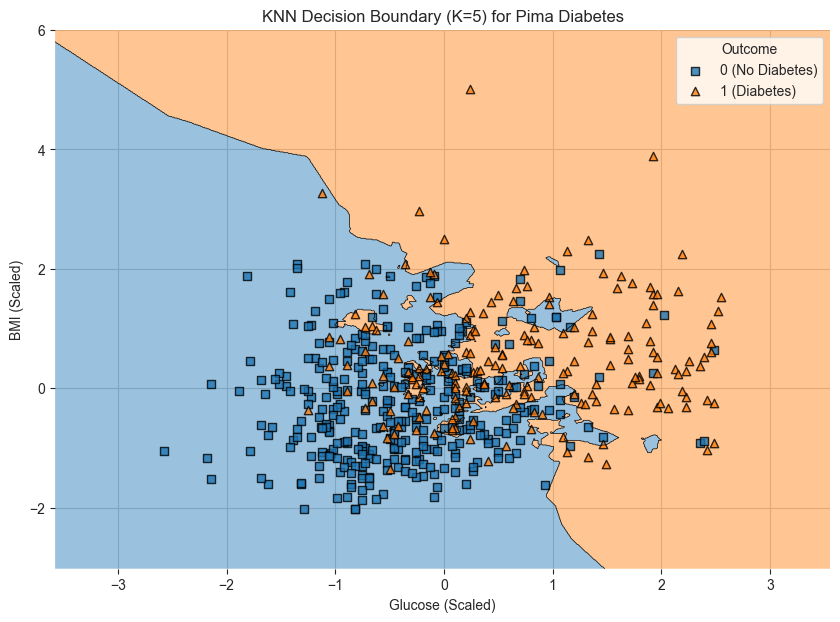

In [23]:
# Ensure mlxtend is installed (magic must be at top-level)
#%pip install mlxtend

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# 5. Plot the decision boundary for the best-performing method
# We'll use 2 most important features. Let's pick 'glucose' (col 1) and 'bmi' (col 5)
# as they are strong predictors for diabetes.

# Use the reloaded Pima dataframe (data_pima) to get column indices
feature_1_idx = data_pima.columns.get_loc('glucose')
feature_2_idx = data_pima.columns.get_loc('bmi')

# Create a 2D dataset from the scaled Pima training data (use the _pima variables)
# We select only the 'glucose' and 'bmi' columns
X_train_2d = X_train_scaled_pima[:, [feature_1_idx, feature_2_idx]]
y_train_np = y_train_pima.values  # mlxtend requires numpy array

# Train a new KNN on just these 2 features
# 'auto' will pick the best algorithm
knn_2d = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn_2d.fit(X_train_2d, y_train_np)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plot_decision_regions(X_train_2d, y_train_np, clf=knn_2d, legend=2)
plt.title('KNN Decision Boundary (K=5) for Pima Diabetes')
plt.xlabel('Glucose (Scaled)')
plt.ylabel('BMI (Scaled)')
plt.legend(title='Outcome', labels=['0 (No Diabetes)', '1 (Diabetes)'])
plt.show()